# *Titanic Survived and Unsurvived Predection*
#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - -  - - - - - -- - - - - - - - -
## *Using Logistic Regression & Decision Tree*

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install matplotlib
# !pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("dataset/train.csv")


# *To show the top 5  columns of the dataframe* 


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## *To know the number of columns and rows*

In [6]:
data.shape

(891, 12)

## *Information  about DataFrame*

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## *Types of datatypes in dataframes*

In [8]:
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

## *To get the  Data columns*

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## *Getting the number of unique values in each column*

In [10]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
a = len(data)
b = len(data[data['Survived'] == 1])
print("Total number of the passengers : ",a)
print("Total number of passenger who survived : ",b)

Total number of the passengers :  891
Total number of passenger who survived :  342


## *Total passenger survived*

In [12]:
print("passenger surived Percentage : ",round(b/a*100,2),"%")

passenger surived Percentage :  38.38 %


In [13]:
#graph and %

In [14]:
print("% of men survived : ", round((len(data[(data['Survived'] == 1) & (data['Sex'] == 'male')])/len(data))*100,2),"%")
print("% of Women survived : ", round((len(data[(data['Survived'] == 1) & (data['Sex'] == 'female')])/len(data))*100,2),"%")

% of men survived :  12.23 %
% of Women survived :  26.15 %


<AxesSubplot:xlabel='Sex', ylabel='count'>

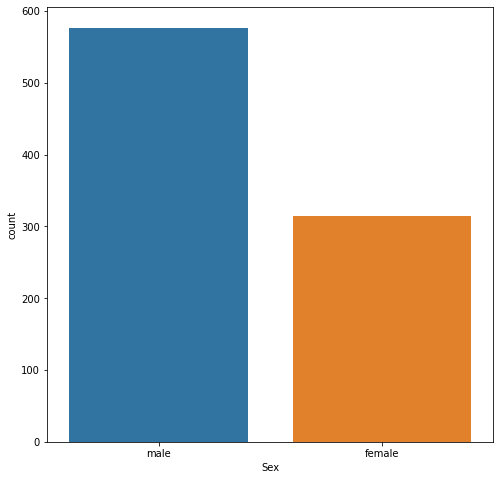

In [15]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Sex', data = data)

In [16]:
print("% of passenger who surived in class 1 : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 1)])/len(data))*100,2),"%")
print("% of passenger who surived in class 2 : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 2)])/len(data))*100,2),"%")
print("% of passenger who surived in class 3 : ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 3)])/len(data))*100,2),"%")


% of passenger who surived in class 1 :  15.26 %
% of passenger who surived in class 2 :  9.76 %
% of passenger who surived in class 3 :  13.36 %


<AxesSubplot:xlabel='Pclass', ylabel='count'>

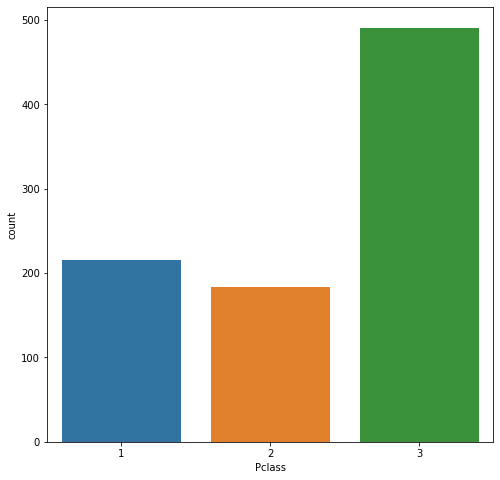

In [17]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Pclass', data = data)

In [18]:
print("% of children who survived : ",round((len(data[(data['Survived'] == 1) & (data['Age'] < 18)])/len(data))*100,2),"%")
print("% of Adult who survived : ",round((len(data[(data['Survived'] == 1) & (data['Age'] > 18)])/len(data))*100,2),"%")

% of children who survived :  6.85 %
% of Adult who survived :  24.69 %


## *Checking Null  Values in each column*

In [19]:
#Check Null value
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## *Percentage of Data Missing in each column*

In [20]:
pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,3),columns = ['Missing%'])

,Missing%
PassengerId,0.000
Survived,0.000
Pclass,0.000
Name,0.000
Sex,0.000
Age,19.865
SibSp,0.000
Parch,0.000
Ticket,0.000
Fare,0.000


## *Column dropped with missing values*

In [21]:
data1 = data.drop(['PassengerId','Name','Ticket'],axis = 1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## *Dropping coloumn having maximun null value*

In [22]:
# Dropping coloumn having maximun null value
data1.drop('Cabin',axis = 1,inplace = True)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## *Assuming the  Missing values in columns*

In [23]:
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])
data1['Age'] = data1['Age'].fillna(data1['Age'].mean())
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## *Setting Target for predection*

In [25]:
target = data1['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## *Graph count for Survived and Unsurvived passengers*

<AxesSubplot:xlabel='Survived', ylabel='count'>

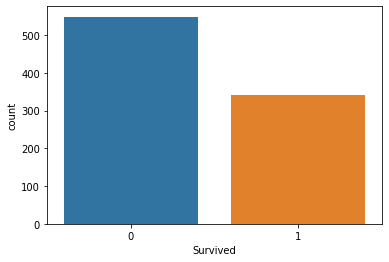

In [26]:
sns.countplot(x = 'Survived', data = data1)

## *Removed Survived from original dataset for Testing*

In [27]:
x = data1.drop('Survived',axis = 1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## *Including object dataypes for testing of model*

In [28]:
x_cat = x.select_dtypes(include = 'object')
x_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


## *Described the Survived passenger data*

In [29]:
x_cat.describe()

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


## *Excluding object dataypes for prediction of model*

In [30]:
x_num = x.select_dtypes(exclude = 'object')
x_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


## *Describe of Numeric Columns*

In [31]:
x_num.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## *Dummies values for the testing and predection*

In [32]:
x_cat_dummy = pd.get_dummies(x_cat,drop_first = True)
x_cat_dummy.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


## *Data after adding the dummies value to the data*

In [33]:
new_data = pd.concat([x_num,x_cat_dummy],axis = 1)
new_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data,target,test_size = 0.20,random_state = 42)
x_train.shape
y_train.shape
x_test.shape
y_test.shape


(179,)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
model1 = LogisticRegression(random_state = 42)
model2 = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

## *Predict Model*

In [36]:
y_predicted1 = model1.predict(x_test)
y_predicted1 
y_predicted2 = model2.predict(x_test)
y_predicted2 

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

## *Model Accuracy*

In [37]:
from sklearn.metrics import accuracy_score
print("Model 1 accuracy : ",accuracy_score(y_test,y_predicted1))
print("Model 2 accuracy : ",accuracy_score(y_test,y_predicted2))

Model 1 accuracy :  0.7988826815642458
Model 2 accuracy :  0.7877094972067039


## *Confusion matrix*

In [38]:
from sklearn.metrics import confusion_matrix
print("Model1 Confussion matrix : ")
cm1 = confusion_matrix(y_test,y_predicted1)
cm1
print("Model1 Confussion matrix : ")
cm2 = confusion_matrix(y_test,y_predicted2)
cm2

Model1 Confussion matrix : 
Model1 Confussion matrix : 


array([[86, 19],
       [19, 55]], dtype=int64)

## *Classification report*

In [39]:
from sklearn.metrics import classification_report
print("Model1 Classification Report : ")
print(classification_report(y_test,y_predicted1))
print("Model2 Classification Report : ")
print(classification_report(y_test,y_predicted2))

Model1 Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Model2 Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

